## Cargando el conjunto de datos

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from sklearn.compose import make_column_selector as selector #Para seleccionar de forma automática las variables numéricas y categóricas
from sklearn.preprocessing import OneHotEncoder #Para codificar las variables categóricas usando dummies
from sklearn.preprocessing import StandardScaler #Para normalizar las variables numéricas
from sklearn.compose import ColumnTransformer #Modifica las columnas usando los preprocesadores
from sklearn.pipeline import make_pipeline #Planifica una secuencia de procesos
from sklearn import set_config #Para mostrar graficamente el pipeline
from sklearn.model_selection import GridSearchCV

set_config(display='diagram')
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [2]:
#iris = datasets.load_iris()
iris = sns.load_dataset("iris")
iris.head()
datos = iris

## Obteniendo la variable respuesta

In [3]:
y = datos.pop("species")

print(y)
print(datos.head())

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


Text(0.5, 1.0, 'Correlación de las variables numéricas de Iris')

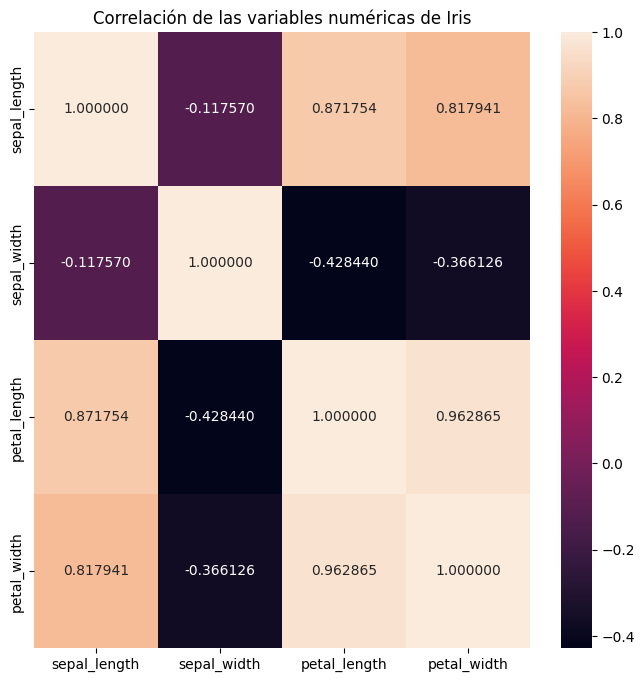

In [4]:
plt.subplots(figsize = (8,8))
sns.heatmap(datos.corr(),annot=True,fmt="f").set_title("Correlación de las variables numéricas de Iris")

### Separando en train y test

#### Virginica

In [256]:
X = datos #El resto de los datos
random.seed(123)

In [257]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

70% de entrenamiento y 30% prueba

In [258]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 36 to 70
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  105 non-null    float64
 1   sepal_width   105 non-null    float64
 2   petal_length  105 non-null    float64
 3   petal_width   105 non-null    float64
dtypes: float64(4)
memory usage: 4.1 KB


In [259]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 130 to 11
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  45 non-null     float64
 1   sepal_width   45 non-null     float64
 2   petal_length  45 non-null     float64
 3   petal_width   45 non-null     float64
dtypes: float64(4)
memory usage: 1.8 KB


### Normalizando los datos

In [260]:
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[:3])

[[-0.41600969  1.01900435 -1.39706395 -1.3154443 ]
 [-1.50652052  1.24920112 -1.56757623 -1.3154443 ]
 [-0.65834543  1.47939788 -1.2833891  -1.3154443 ]]


### Creando el modelo

In [261]:
mlp = MLPClassifier(hidden_layer_sizes=(3,4), max_iter=1000)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
y_pred

c:\Users\flaquitqm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


array(['virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'virginica', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'virginica', 'setosa', 'setosa'], dtype='<U10')

In [262]:
cm = confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)

Matriz de confusión
 [[18  0  0]
 [ 0 11  0]
 [ 0  2 14]]
Accuracy:  0.9555555555555556
Precision:  0.9555555555555556
recall:  0.9555555555555556


### Tuneando parámetros
Vamos a trabajar con el conjunto de datos de titanic

In [263]:
datos = pd.read_csv("../Datos/titanic.csv")

Comprobando que se cargaron los datos correctamente.

In [264]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Vamos a quitar las columnas que ya vimos en ejemplos anteriores que no van a aportar a ningún modelo que hagamos. Por ejemplo el id del pasajero, el nombre, la cabina y el ticket

In [265]:
datos.pop("PassengerId")
datos.pop("Name")
datos.pop("Cabin")
datos.pop("Ticket")

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

Comprobemos que fueron eliminadas las columnas

In [266]:
print(datos.shape)
print(datos.columns)

(891, 8)
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


Veamos de que tipo son las variables de nuestro conjunto de datos

In [267]:
datos[datos['Age'].isnull()] = datos["Age"].median() #Llenando los Na de la edad con la mediana
print(datos.describe())
datos.dropna(inplace=True)
print(datos.isnull().sum())
datos["Sex"] = datos["Sex"].astype(str)
datos["Embarked"] = datos["Embarked"].astype(str)
print(datos.dtypes)

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     5.887767    7.354658   29.361582    5.973064    5.907969   33.364627
std     11.024527   10.312310   13.019697   11.004767   11.032152   47.440693
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    9.500000
50%      1.000000    3.000000   28.000000    0.000000    0.000000   26.000000
75%      1.000000    3.000000   35.000000    2.000000    2.000000   28.000000
max     28.000000   28.000000   80.000000   28.000000   28.000000  512.329200
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

Hay 3 variables categóricas y 3 numéricas. Las categóricas son Pclass, Embarked y la variable respuesta. Las otras 3 son numéricas

Si se fija, las variables categóricas casi siempre estpan como string por lo que el tipo de datos es Object, pero Object no es exclusivo de variables que guardan texto, por lo que hay que ser cuidadoses a la hora de separarlas de forma automática. 

In [268]:
#la variable respuesta
target = datos.pop("Survived")

In [269]:
#Creamos los selectores
selector_numericas = selector(dtype_exclude=object) #Seleccionamos todas las variables que no son Object
selector_categoricas = selector(dtype_include=object) #Seleccionamos todas las varibles de tipo object
#Seleccionamos las columnas que cumplen con los selectores pasándole los datos
numericas = selector_numericas(datos)
categoricas = selector_categoricas(datos)
#veamos que tan bien separó las variables
print("Numéricas: ",numericas)
print("Categóricas: ", categoricas)


Numéricas:  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categóricas:  ['Sex', 'Embarked']


Ahora vamos a crear los objetos de los preprocesadores

In [270]:
preprocesador_categorico = OneHotEncoder(handle_unknown="ignore")
preprocesador_numerico = StandardScaler()

Ahora creamos el objeto que transformará las columnas con los preprocesadores correspondientes al tipo de variable

In [271]:
preprocesador = ColumnTransformer([
    ('one_hot_encoder',preprocesador_categorico,categoricas),
    ('standard_scaler',preprocesador_numerico, numericas)
])

Nótese que hasta aquí no se ha hecho ningún cambio, solo hemos creado los objetos que se utilizarán en el pipeline. <br>
Vamos a crear el modelo a continuación: <br>
Se creará un perceptrón multicapa con dos capas ocultas de 5 y 3 neuronas respectivamente con función de activación de tangente hiperbólica

In [272]:
modelo = make_pipeline(preprocesador,MLPClassifier(activation="tanh",verbose=True,hidden_layer_sizes=(5,3)))
modelo

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare'])])),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', hidden_layer_sizes=(5, 3),
                               verbose=True))])

Ya tenemos creado el modelo. Vamos a dividir los datos en entrenamiento y prueba usando un muestreo aleatorio simple con 70% para entrenamiento y 30% prueba.

In [273]:
data_train, data_test, target_train, target_test = train_test_split(
    datos, target, train_size=0.7,test_size=0.3)
print("Shape train",data_train.shape)
print("Shape test",data_test.shape)
datos.isnull().sum()

Shape train (622, 7)
Shape test (267, 7)


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Vamos a entrenar el modelo

In [274]:
modelo.fit(data_train,target_train)

Iteration 1, loss = 1.41249656
Iteration 2, loss = 1.38418815
Iteration 3, loss = 1.35625649
Iteration 4, loss = 1.32902740
Iteration 5, loss = 1.30266866
Iteration 6, loss = 1.27664981
Iteration 7, loss = 1.25134075
Iteration 8, loss = 1.22626579
Iteration 9, loss = 1.20229338
Iteration 10, loss = 1.17858838
Iteration 11, loss = 1.15540134
Iteration 12, loss = 1.13323065
Iteration 13, loss = 1.11088870
Iteration 14, loss = 1.08974705
Iteration 15, loss = 1.06906789
Iteration 16, loss = 1.04929993
Iteration 17, loss = 1.02954731
Iteration 18, loss = 1.01079749
Iteration 19, loss = 0.99251571
Iteration 20, loss = 0.97541786
Iteration 21, loss = 0.95880810
Iteration 22, loss = 0.94240701
Iteration 23, loss = 0.92667700
Iteration 24, loss = 0.91147599
Iteration 25, loss = 0.89720034
Iteration 26, loss = 0.88365593
Iteration 27, loss = 0.87016000
Iteration 28, loss = 0.85713759
Iteration 29, loss = 0.84451696
Iteration 30, loss = 0.83230060
Iteration 31, loss = 0.82057355
Iteration 32, los

c:\Users\flaquitqm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare'])])),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', hidden_layer_sizes=(5, 3),
                               verbose=True))])

Ahora vamos a predecir con el modelo

In [275]:
pred = modelo.predict(data_test)
pred[:5]

array([0, 0, 1, 1, 1], dtype=int64)

In [276]:
cm = confusion_matrix(target_test,pred)
accuracy=accuracy_score(target_test,pred)
precision =precision_score(target_test,pred,average='micro')
recall =  recall_score(target_test,pred,average='micro')
f1 = f1_score(target_test,pred,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)

Matriz de confusión
 [[110  18   0]
 [ 26  61   0]
 [  0   0  52]]
Accuracy:  0.8352059925093633
Precision:  0.8352059925093633
recall:  0.8352059925093633


Tenemos un accuracy de 83% <br>
#### Tuneo de parámetros usando grid search cross validation

Con la función get_params del clasificador podemos saber cuales fueron los nombres y valores de los parámetros del modelo

In [285]:
modelo.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'mlpclassifier', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__one_hot_encoder', 'columntransformer__standard_scaler', 'columntransformer__one_hot_encoder__categories', 'columntransformer__one_hot_encoder__drop', 'columntransformer__one_hot_encoder__dtype', 'columntransformer__one_hot_encoder__handle_unknown', 'columntransformer__one_hot_encoder__sparse', 'columntransformer__standard_scaler__copy', 'columntransformer__standard_scaler__with_mean', 'columntransformer__standard_scaler__with_std', 'mlpclassifier__activation', 'mlpclassifier__alpha', 'mlpclassifier__batch_size', 'mlpclassifier__beta_1', 'mlpclassifier__beta_2', 'mlpclassifier__early_stopping', 'mlpclassifier__epsilon', 'mlpclassifier__hid

Los parámetros que son tunneables de la red neuronal aparecerán con el prefijo mlpclassifier_ <br>
Hagamos una lista de parámetros a tunnear

In [290]:
parametros_tun  = param_grid = {
    'mlpclassifier__max_iter': (100,200,500,1000),
    'mlpclassifier__learning_rate_init': (0.01, 0.1, 1,10),
    'mlpclassifier__hidden_layer_sizes':((3,2),(5,3),(10,2))}
model_grid_search = GridSearchCV(modelo, param_grid=parametros_tun,
                                 n_jobs=2, cv=10) #Vamos a usar dos procesadores(n_jobs), y 10 k-folds
model_grid_search.fit(data_train, target_train)

Iteration 1, loss = 1.23636822
Iteration 2, loss = 1.09721806
Iteration 3, loss = 0.98022097
Iteration 4, loss = 0.87613605
Iteration 5, loss = 0.80131883
Iteration 6, loss = 0.75461265
Iteration 7, loss = 0.72097777
Iteration 8, loss = 0.69652224
Iteration 9, loss = 0.67799777
Iteration 10, loss = 0.66326446
Iteration 11, loss = 0.65080719
Iteration 12, loss = 0.64061283
Iteration 13, loss = 0.63084741
Iteration 14, loss = 0.62183326
Iteration 15, loss = 0.61380622
Iteration 16, loss = 0.60574573
Iteration 17, loss = 0.59775651
Iteration 18, loss = 0.58941708
Iteration 19, loss = 0.58006029
Iteration 20, loss = 0.57132595
Iteration 21, loss = 0.55947525
Iteration 22, loss = 0.54747086
Iteration 23, loss = 0.53337825
Iteration 24, loss = 0.51854368
Iteration 25, loss = 0.50454481
Iteration 26, loss = 0.49341095
Iteration 27, loss = 0.48169552
Iteration 28, loss = 0.47218133
Iteration 29, loss = 0.46368489
Iteration 30, loss = 0.45608742
Iteration 31, loss = 0.45194001
Iteration 32, los

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('one_hot_encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Sex',
                                                                          'Embarked']),
                                                                        ('standard_scaler',
                                                                         StandardScaler(),
                                                                         ['Pclass',
                                                                          'Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare'])])),
                                       ('mlpclassifier',
                                        MLPClassifier(activation='tanh',
                                                      hidden_layer_sizes=(5, 3),
                                                      verbose=True))]),
             n_jobs=2,
             param_grid={'mlpclassifier__hidden_layer_sizes': ((3, 2), (5, 3),
                                                               (10, 2)),
                         'mlpclassifier__learning_rate_init': (0.01, 0.1, 1,
                                                               10),
                         'mlpclassifier__max_iter': (100, 200, 500, 1000)})

¿Cuál será la mejor combinación de parámetros?


In [291]:
model_grid_search.best_params_

{'mlpclassifier__hidden_layer_sizes': (3, 2),
 'mlpclassifier__learning_rate_init': 0.01,
 'mlpclassifier__max_iter': 1000}

Vamos a predecir con el mejor modelo

In [292]:
pred = model_grid_search.predict(data_test)

In [293]:
cm = confusion_matrix(target_test,pred)
accuracy=accuracy_score(target_test,pred)
precision =precision_score(target_test,pred,average='micro')
recall =  recall_score(target_test,pred,average='micro')
f1 = f1_score(target_test,pred,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('recall: ',recall)

Matriz de confusión
 [[110  18   0]
 [ 22  65   0]
 [  0   0  52]]
Accuracy:  0.850187265917603
Precision:  0.850187265917603
recall:  0.850187265917603


Como se puede ver el accuracy mejoró por 2 unidades porcentuales